In [16]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive


In [17]:
ls

MyDrive/  Shareddrives/


In [18]:
cd /gdrive/MyDrive/Music_genre

/gdrive/MyDrive/Music_genre


In [19]:
ls

test.csv  train.csv


# Importing Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [22]:
df_train=pd.read_csv('train.csv')
df_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [24]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,200744.458851,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,111989.127131,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,0.501650,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,166337.000000,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,209160.000000,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,252490.000000,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1477187.000000,5.000000,10.000000


# EDA

In [25]:
df_train.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [26]:
df_train['Popularity'].fillna(value =df_train['Popularity'].mean() , inplace = True)
df_train['key'].fillna(value =df_train['key'].mean() , inplace = True)
df_train['instrumentalness'].fillna(value =df_train['instrumentalness'].mean() , inplace = True)

In [27]:
df_train.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [28]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [29]:
binary_cols

['mode']

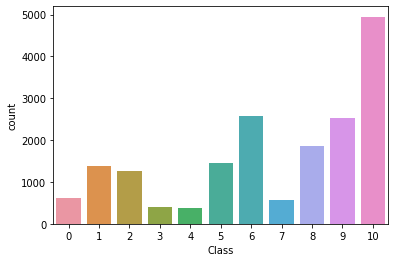

In [30]:
sns.countplot("Class", data=df_train)

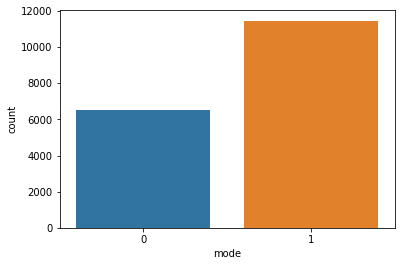

In [31]:
sns.countplot("mode", data=df_train) 

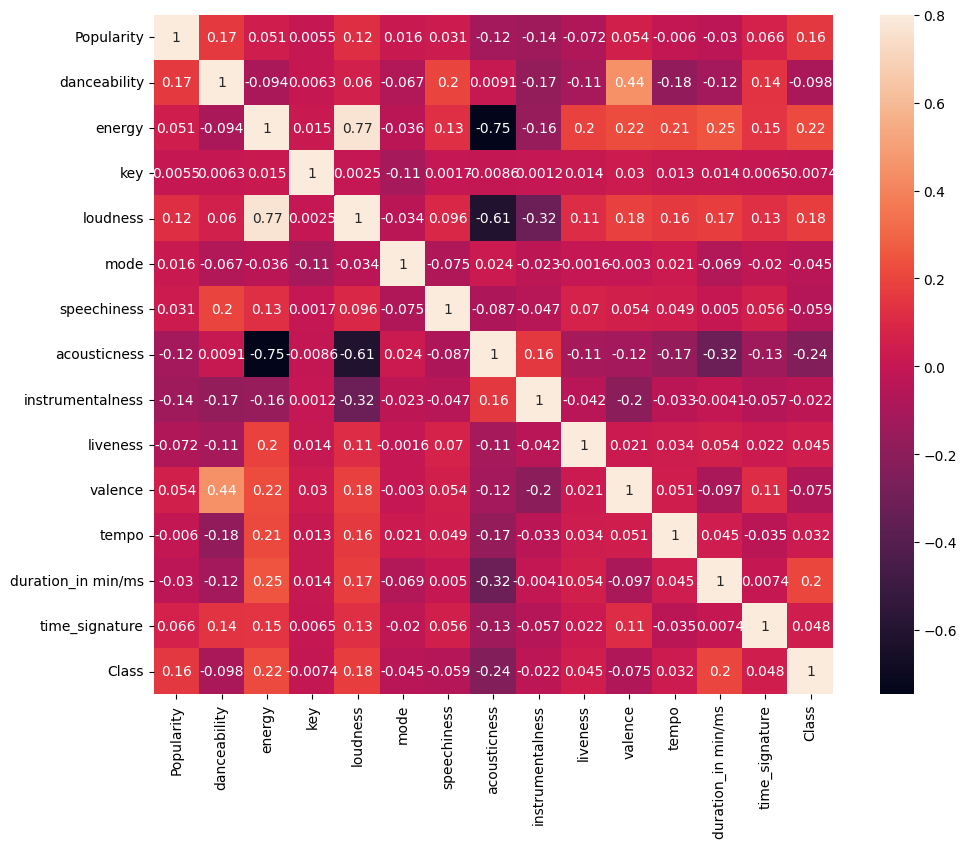

In [32]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

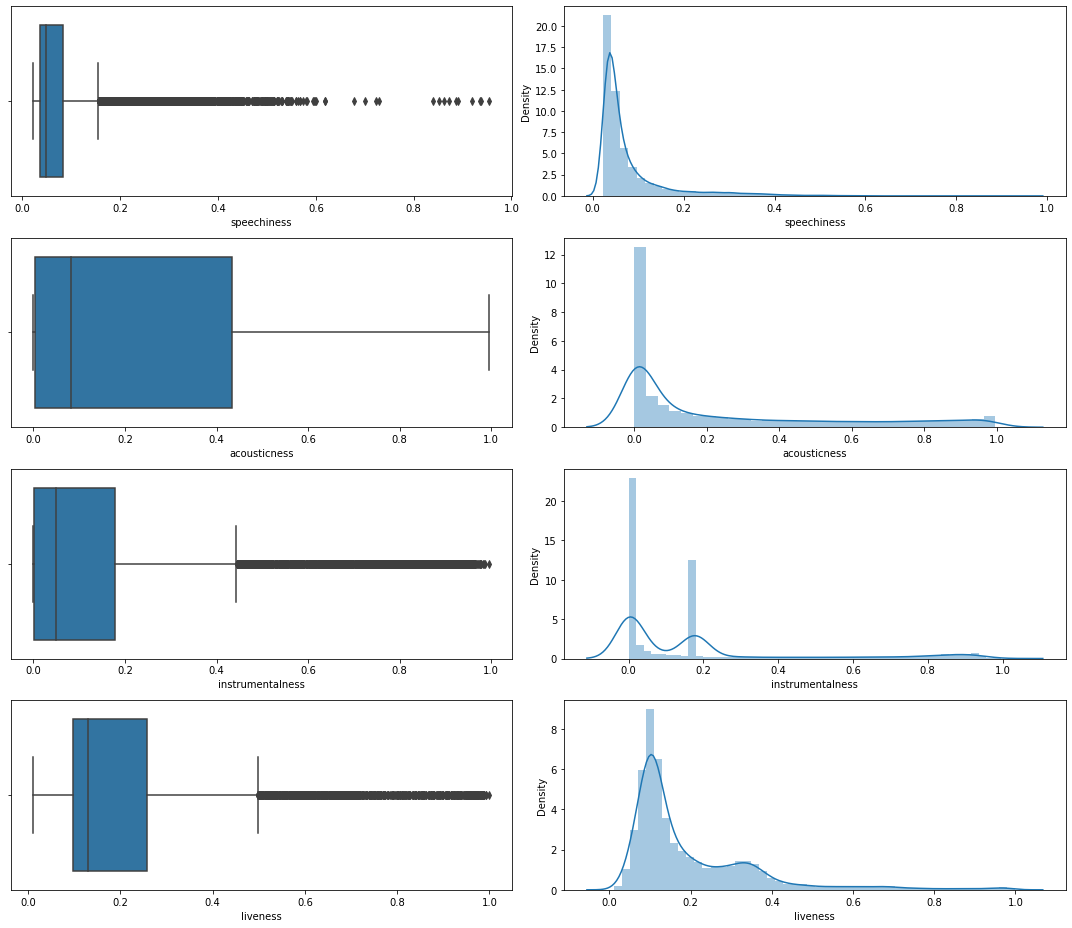

In [33]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df_train["speechiness"], ax = ax[0,0])
sns.distplot(df_train['speechiness'], ax = ax[0,1])
sns.boxplot(x= df_train["acousticness"], ax = ax[1,0])
sns.distplot(df_train['acousticness'], ax = ax[1,1])
sns.boxplot(x= df_train["instrumentalness"], ax = ax[2,0])
sns.distplot(df_train['instrumentalness'], ax = ax[2,1])
sns.boxplot(x= df_train["liveness"], ax = ax[3,0])
sns.distplot(df_train['liveness'], ax = ax[3,1])
plt.tight_layout()

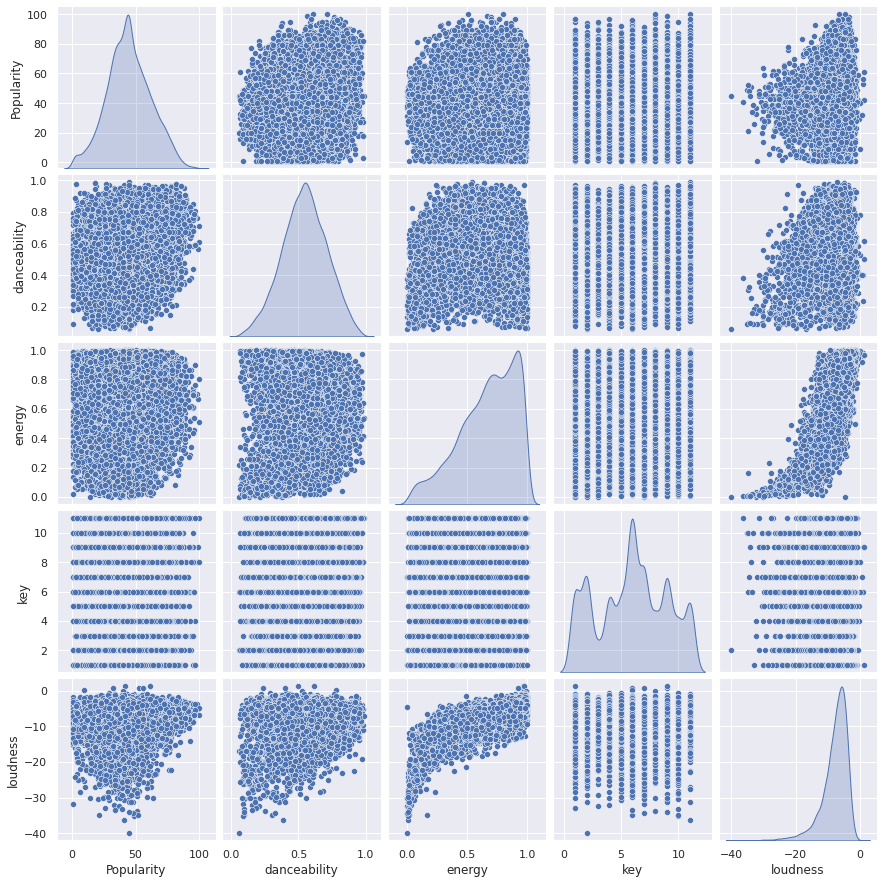

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [35]:
X = df_train.drop(['Class','Artist Name', 'Track Name'], axis = 1)
Y = df_train["Class"]
x_Data = X.values
y_Data = Y.values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [39]:
model.score(X_test,y_test)

0.33611111111111114

In [40]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.35972222 0.34491143 0.35012157 0.33136506 0.34421674]


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [42]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.34731869963878853

In [43]:
confusion_matrix(y_train, pred)

array([[ 274,    0,    0,   69,   87,    0,    0,   59,    0,    0,    0],
       [   0,    0,    7,    0,    0,    0,   54,    0,    0,   44,  982],
       [   0,    0,   42,    0,    0,    0,  139,    0,    4,   24,  782],
       [ 128,    0,    0,  143,   31,    0,    0,   20,    0,    2,    0],
       [  77,    0,    0,    7,  201,    0,    0,   31,    0,    0,    0],
       [   0,    0,    9,    0,    0,    1,   47,    0,    0,  160,  968],
       [   0,    0,   59,    0,    0,    0,  183,    0,    1,   79, 1765],
       [  60,    0,    0,    8,    6,    0,    0,  399,    0,    0,    0],
       [   0,    0,    4,    0,    0,    0,   11,    0,   18,   14, 1425],
       [ 142,    0,    4,   33,  139,    0,   40,    4,    1,  275, 1355],
       [  37,    0,   43,    9,  101,    1,  167,    1,    7,  149, 3464]])

In [44]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [45]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [46]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.39      0.60      0.48       136
           1       0.00      0.00      0.00       286
           2       0.26      0.04      0.06       281
           3       0.50      0.36      0.42        78
           4       0.35      0.65      0.46        71
           5       0.00      0.00      0.00       262
           6       0.27      0.09      0.13       500
           7       0.72      0.82      0.76       103
           8       0.64      0.02      0.05       382
           9       0.37      0.11      0.18       531
          10       0.31      0.87      0.46       970

    accuracy                           0.34      3600
   macro avg       0.35      0.32      0.27      3600
weighted avg       0.32      0.34      0.24      3600



In [47]:
cma = confusion_matrix(y_test, predicted_test)

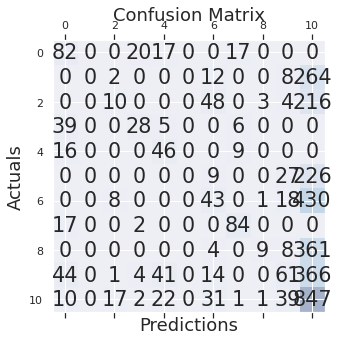

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier as rf

In [50]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [51]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.6358710752986941

In [52]:
confusion_matrix(y_train, pred)

array([[ 456,    0,    0,    3,   16,    0,    0,    3,    0,   10,    1],
       [   0,   56,    4,    0,    0,   43,  178,    0,   30,   74,  702],
       [   0,    0,  288,    0,    0,   14,   66,    0,    5,   87,  531],
       [  32,    0,    0,  280,    9,    0,    0,    1,    0,    2,    0],
       [  41,    0,    0,    1,  263,    0,    0,    0,    0,    9,    2],
       [   0,    0,    1,    0,    0,  909,   27,    0,    1,  145,  102],
       [   0,    0,    8,    0,    0,   70,  779,    0,   44,  168, 1018],
       [   9,    0,    0,    8,    0,    0,    0,  456,    0,    0,    0],
       [   0,    0,    1,    0,    0,    2,   30,    0,  871,    4,  564],
       [  19,    0,   12,    1,    9,  131,   48,    0,    1, 1258,  514],
       [   8,    0,    9,    1,   16,   30,   80,    0,  118,  179, 3538]])

In [53]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [54]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [55]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       136
           1       0.14      0.00      0.01       286
           2       0.73      0.22      0.33       281
           3       0.81      0.72      0.76        78
           4       0.64      0.69      0.67        71
           5       0.65      0.68      0.66       262
           6       0.39      0.22      0.28       500
           7       0.89      0.92      0.90       103
           8       0.70      0.51      0.59       382
           9       0.51      0.52      0.52       531
          10       0.42      0.76      0.54       970

    accuracy                           0.52      3600
   macro avg       0.60      0.55      0.55      3600
weighted avg       0.52      0.52      0.48      3600



In [56]:
cma = confusion_matrix(y_test, pred_test)

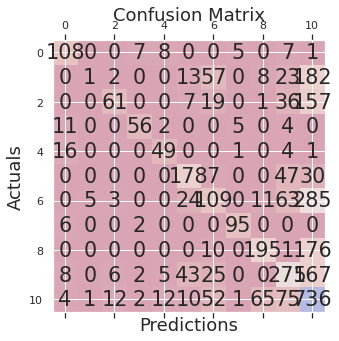

In [57]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [58]:
from sklearn import tree

In [59]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [60]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

0.9212975826618505

In [61]:
confusion_matrix(y_train, pred1)

array([[ 489,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1085,    0,    0,    0,    0,    1,    0,    0,    0,    1],
       [   0,    5,  986,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  324,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  316,    0,    0,    0,    0,    0,    0],
       [   0,    3,    1,    0,    0, 1181,    0,    0,    0,    0,    0],
       [   0,  376,    0,    0,    0,    0, 1710,    0,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,  473,    0,    0,    0],
       [   0,    2,    0,    0,    0,    0,    1,    0, 1469,    0,    0],
       [   1,   21,    2,    0,    1,   44,   65,    0,    4, 1855,    0],
       [   0,  223,   60,    0,    0,    4,  133,    0,  133,   51, 3375]])

In [62]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [63]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       136
           1       0.07      0.09      0.08       286
           2       0.28      0.26      0.27       281
           3       0.59      0.72      0.65        78
           4       0.45      0.54      0.49        71
           5       0.55      0.54      0.54       262
           6       0.19      0.19      0.19       500
           7       0.88      0.86      0.87       103
           8       0.44      0.43      0.44       382
           9       0.42      0.38      0.40       531
          10       0.35      0.34      0.34       970

    accuracy                           0.36      3600
   macro avg       0.44      0.45      0.44      3600
weighted avg       0.37      0.36      0.36      3600



In [64]:
cma = confusion_matrix(y_test, pred1_test)

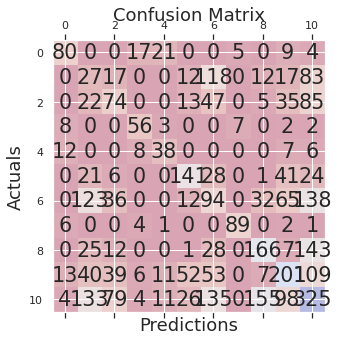

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [67]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.297304806890803

In [68]:
confusion_matrix(y_train, pred_LR)

array([[ 489,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   33, 1054],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   14,  977],
       [ 324,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 316,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   74, 1111],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,   62, 2024],
       [ 472,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   19, 1453],
       [ 318,    0,    0,    0,    0,    0,    0,    0,    0,   47, 1628],
       [ 148,    0,    0,    0,    0,    0,    0,    0,    2,   86, 3743]])

In [69]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [70]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42       136
           1       0.00      0.00      0.00       286
           2       0.00      0.00      0.00       281
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00        71
           5       0.00      0.00      0.00       262
           6       0.00      0.00      0.00       500
           7       0.00      0.00      0.00       103
           8       0.00      0.00      0.00       382
           9       0.14      0.02      0.03       531
          10       0.30      0.94      0.46       970

    accuracy                           0.29      3600
   macro avg       0.06      0.18      0.08      3600
weighted avg       0.11      0.29      0.14      3600



In [71]:
cma = confusion_matrix(y_test, pred_LR_test)

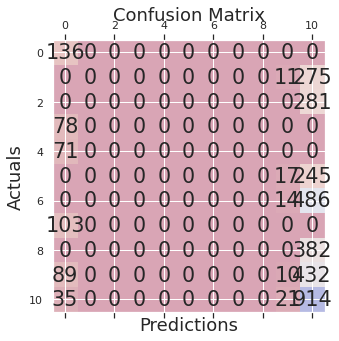

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [73]:
from sklearn.neural_network import MLPClassifier

In [74]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [75]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.1392747985551542

In [76]:
confusion_matrix(y_train, pred_NN)

array([[  32,    0,    0,    8,    0,    0,   62,    0,    0,  387,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1087,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  991,    0],
       [  81,    0,    0,   14,    1,    0,   45,    0,    0,  183,    0],
       [   4,    0,    0,    0,    0,    0,    5,    0,    0,  307,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1185,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 2087,    0],
       [  41,    0,    0,    2,    0,    0,   54,    0,    0,  376,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1472,    0],
       [  25,    0,    0,    0,    0,    0,    9,    0,    0, 1959,    0],
       [   3,    0,    0,    1,    0,    0,    5,    0,    0, 3970,    0]])

In [77]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [78]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.12      0.04      0.06       136
           1       0.00      0.00      0.00       286
           2       0.00      0.00      0.00       281
           3       0.50      0.01      0.03        78
           4       0.00      0.00      0.00        71
           5       0.00      0.00      0.00       262
           6       0.00      0.00      0.00       500
           7       0.00      0.00      0.00       103
           8       0.00      0.00      0.00       382
           9       0.15      0.99      0.26       531
          10       0.00      0.00      0.00       970

    accuracy                           0.15      3600
   macro avg       0.07      0.09      0.03      3600
weighted avg       0.04      0.15      0.04      3600



In [79]:
cma = confusion_matrix(y_test, pred_NN_test)

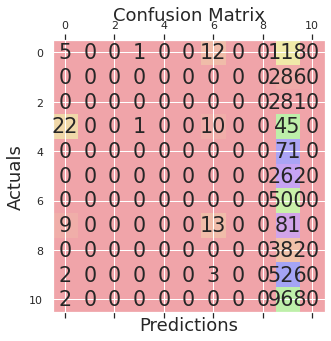

In [80]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [81]:
import xgboost as xgb

In [82]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [83]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.5823145318143929

In [84]:
confusion_matrix(y_train, pred_XGB)

array([[ 422,    0,    0,   21,   28,    0,    0,    7,    0,    8,    3],
       [   0,   19,   30,    0,    0,   57,  220,    0,   51,   86,  624],
       [   0,    0,  406,    0,    0,   16,   99,    0,   10,   87,  373],
       [  38,    0,    0,  258,   12,    0,    0,    8,    0,    6,    2],
       [  45,    0,    0,    2,  247,    0,    0,    0,    0,   18,    4],
       [   0,    0,   12,    0,    0,  898,   37,    0,    2,  149,   87],
       [   0,    2,   67,    0,    0,  104,  728,    0,   86,  170,  930],
       [  12,    0,    0,    7,    0,    0,    0,  454,    0,    0,    0],
       [   0,    0,    5,    0,    0,    4,   44,    0,  857,    9,  553],
       [  41,    0,   57,    6,   26,  188,  101,    1,    7, 1149,  417],
       [  20,    0,  119,    6,   37,   54,  191,    0,  319,  288, 2945]])

In [85]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [86]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       136
           1       0.33      0.00      0.01       286
           2       0.55      0.39      0.46       281
           3       0.77      0.77      0.77        78
           4       0.60      0.73      0.66        71
           5       0.65      0.71      0.68       262
           6       0.39      0.27      0.32       500
           7       0.89      0.94      0.92       103
           8       0.63      0.58      0.60       382
           9       0.55      0.54      0.55       531
          10       0.46      0.69      0.55       970

    accuracy                           0.53      3600
   macro avg       0.59      0.58      0.57      3600
weighted avg       0.52      0.53      0.51      3600



In [87]:
cma = confusion_matrix(y_test, pred_XGB_test)

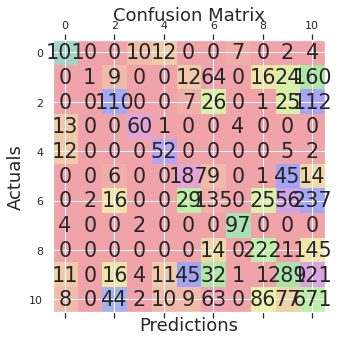

In [88]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

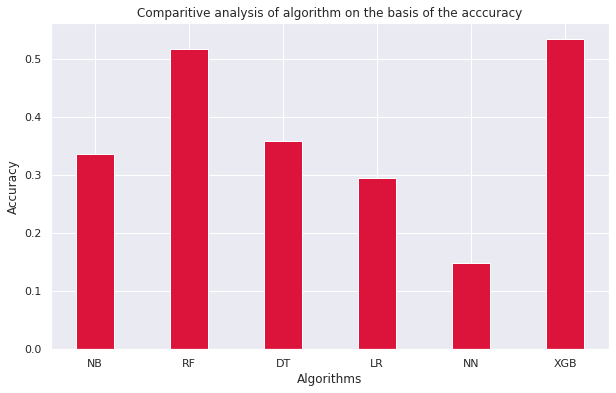

In [89]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


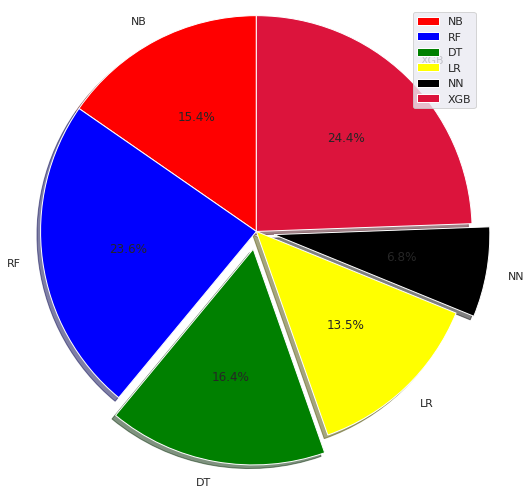

In [90]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [91]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']